# **Problem Statement:**

In today's digital age, the volume of available books is overwhelming, making it challenging for readers to discover new books that match their tastes. Traditional methods of book recommendations, such as word-of-mouth and bestseller lists, are not personalized and often fail to cater to individual preferences. A personalized book recommendation system can enhance user experience by suggesting books that align with each reader's unique interests and reading history.

# **Objective:**


The objective is to develop a personalized book recommendation system that enhances user experience by providing tailored book suggestions based on individual reading preferences and history, thereby increasing user engagement and effectively utilizing data to make accurate and adaptive recommendations.

# **About the Dataset:**


1.   Books

     *   ISBN
     *   Book-Title
     *   Book-Author
     *   Year-Of-Publication
     *   Publisher
     *   Image-URL-S
     *   Image-URL-M
     *   Image-URL-L


2.   Users

     *   User-ID
     *   Location
     *   Age


3.   Ratings

     *   User-ID
     *   ISBN
     *   Book-Rating

# Load Libraries

In [1]:
!pip install gdown -q

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import gdown
import matplotlib.pyplot as plt

# Load the Datasets

In [3]:
url_book = f'https://drive.google.com/uc?id=1d08FYTSJJAeRgaJos6hYuZpzqnLiEGn_'
output = 'books.csv'
gdown.download(url_book, output, quiet=False)

books = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1d08FYTSJJAeRgaJos6hYuZpzqnLiEGn_
To: /content/books.csv
100%|██████████| 73.3M/73.3M [00:02<00:00, 33.7MB/s]
<ipython-input-3-a7f6908cc6d1>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(output)


In [4]:
url_users = f'https://drive.google.com/uc?id=1Dpr2oyFOJFlY9mtRKj4PMf_OzP9V54R7'
output = 'users.csv'
gdown.download(url_users, output, quiet=False)

users = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1Dpr2oyFOJFlY9mtRKj4PMf_OzP9V54R7
To: /content/users.csv
100%|██████████| 11.0M/11.0M [00:00<00:00, 44.7MB/s]


In [5]:
url_ratings = f'https://drive.google.com/uc?id=1ytdfbZmDzNh2crftALZ3EsqQRzBm6j5j'
output = 'ratings.csv'
gdown.download(url_ratings, output, quiet=False)

ratings = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1ytdfbZmDzNh2crftALZ3EsqQRzBm6j5j
To: /content/ratings.csv
100%|██████████| 22.6M/22.6M [00:00<00:00, 63.8MB/s]


# Looking into the datasets

In [6]:
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
242627,0394800192,Ten Apples Up On Top! (I Can Read It All by My...,DR SEUSS,1961,Random House Books for Young Readers,http://images.amazon.com/images/P/0394800192.0...,http://images.amazon.com/images/P/0394800192.0...,http://images.amazon.com/images/P/0394800192.0...
181305,0330487272,The Many-coloured Land,Christopher Koch,2003,Pan Macmillan,http://images.amazon.com/images/P/0330487272.0...,http://images.amazon.com/images/P/0330487272.0...,http://images.amazon.com/images/P/0330487272.0...
203939,0471593613,Handbook of Model Rocketry,G. Harry Stine,1994,Wiley,http://images.amazon.com/images/P/0471593613.0...,http://images.amazon.com/images/P/0471593613.0...,http://images.amazon.com/images/P/0471593613.0...
264683,0553348647,NOTES TO MYSELF,HUGH PRATHER,1990,Bantam,http://images.amazon.com/images/P/0553348647.0...,http://images.amazon.com/images/P/0553348647.0...,http://images.amazon.com/images/P/0553348647.0...
211059,0739438719,Return To Me,Rosemary Rogers,2003,Mira,http://images.amazon.com/images/P/0739438719.0...,http://images.amazon.com/images/P/0739438719.0...,http://images.amazon.com/images/P/0739438719.0...


In [7]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [8]:
books.nunique()

,0
ISBN,271360
Book-Title,242135
Book-Author,102022
Year-Of-Publication,202
Publisher,16807
Image-URL-S,271044
Image-URL-M,271044
Image-URL-L,271041


In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
num_duplicates = books.duplicated('Book-Title').sum()
num_duplicates

29225

In [11]:
books.drop_duplicates('Book-Title', inplace=True)

In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242135 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 242135 non-null  object
 1   Book-Title           242135 non-null  object
 2   Book-Author          242133 non-null  object
 3   Year-Of-Publication  242135 non-null  object
 4   Publisher            242134 non-null  object
 5   Image-URL-S          242135 non-null  object
 6   Image-URL-M          242135 non-null  object
 7   Image-URL-L          242132 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(242135, 8)
(1149780, 3)
(278858, 3)


In [16]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,1
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [17]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [18]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [19]:
books.duplicated().sum()

0

In [20]:
ratings.duplicated().sum()

0

In [21]:
users.duplicated().sum()

0

# Popularity Based Recommender System

In [22]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [23]:
print(ratings_with_name['Book-Rating'].unique())

[ 0  5  9  8  6  7  4 10  3  2  1]


In [24]:
ratings_with_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883079 entries, 0 to 883078
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              883079 non-null  int64 
 1   ISBN                 883079 non-null  object
 2   Book-Rating          883079 non-null  int64 
 3   Book-Title           883079 non-null  object
 4   Book-Author          883077 non-null  object
 5   Year-Of-Publication  883079 non-null  object
 6   Publisher            883078 non-null  object
 7   Image-URL-S          883079 non-null  object
 8   Image-URL-M          883079 non-null  object
 9   Image-URL-L          883075 non-null  object
dtypes: int64(2), object(8)
memory usage: 67.4+ MB


In [25]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df.sample(10)

,Book-Title,num_ratings
19991,Barcelona,4
210722,The Tower of Alchemy: An Advanced Guide to the...,1
160089,Sid Meier's Alpha Centauri: Prima's Official S...,1
126439,"My Son the Wizard (Stasheff, Christopher. Wiza...",3
205828,The Sands of Time: A Hermux Tantamoq Adventure...,14
62527,Ex Cattedra,3
105364,Leadership Aikido: 6 Business Practices That C...,1
115303,Making the Most of Marin: A Best Selling Guide...,1
222640,"Trouble for Lucia (Make Way for Lucia, Part VI)",1
139748,Petite philosophie de l'amour,2


In [26]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].agg(lambda x: x.astype(float).mean()).reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df.sample(10)

,Book-Title,avg_rating
61763,Ether Day : The Strange Tale of America's Grea...,0.000000
158724,Shadows Kiss,1.666667
180496,The Cat Who Wished to Be a Man,0.000000
120439,Miguel Street,2.857143
111042,Lord of Lightning,0.000000
574,101 Ways to Win Homecoming Queen (Three of a K...,0.000000
233189,Where I Was From,1.250000
72360,Gaia: The Growth of an Idea,2.333333
144919,"Pulling Together (Cheerleaders, No 21)",0.000000
209318,The Sunday Wife,4.083333


In [27]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df.sample(10)

,Book-Title,num_ratings,avg_rating
69167,Forbidden Love,6,4.166667
144717,Psychic Families,1,0.000000
180841,The Chelsea Whistle (Live Girls Series),3,6.333333
142502,Pot of Gold,34,1.470588
228829,WORKING IT THROUGH,1,0.000000
162368,Smile and Say Murder (Nancy Drew Files (Paperb...,2,0.000000
10829,Alias Grace : A Novel,84,3.940476
20863,Bearing Fruit: A Child Learns About the Spirit...,1,0.000000
47510,Decorative Accents for the Garden,1,5.000000
84949,Homeopathic Medical Repertory,1,10.000000


In [28]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False)

In [29]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

## Top-10 Books based on Average Ratings

In [30]:
popular_df.head(10)

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,334,5.571856
1,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
2,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,389,4.920308
3,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,571,4.900175
4,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,351,4.729345
5,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,883,4.652322
6,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,403,4.635236
7,The Five People You Meet in Heaven,Mitch Albom,http://images.amazon.com/images/P/0786868716.0...,427,4.543326
8,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,257,4.505837
9,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,1295,4.468726


# Collaborative Filtering Based Recommender System


## Calculate the number of ratings per user

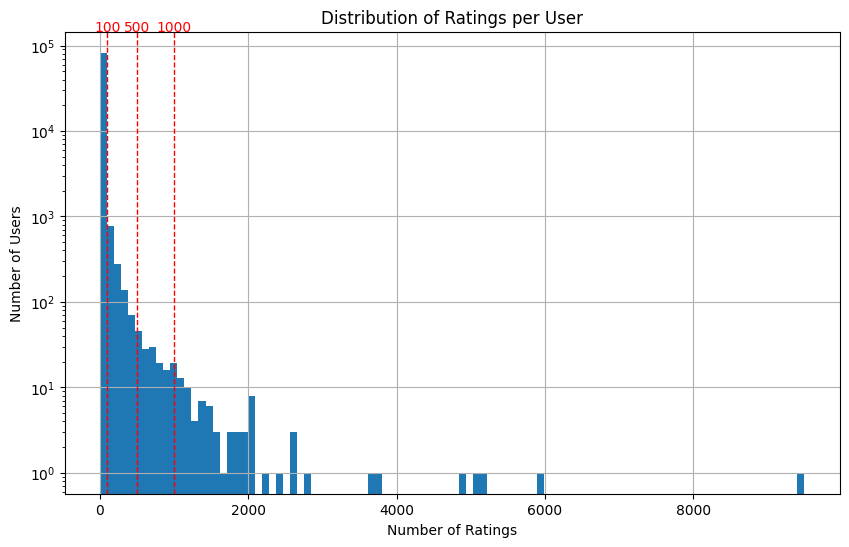

In [41]:
ratings_per_user = ratings_with_name.groupby('User-ID').count()['Book-Rating']

plt.figure(figsize=(10, 6))
ratings_per_user.hist(bins=100)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.yscale('log')

thresholds = [100, 500, 1000]
for threshold in thresholds:
    plt.axvline(x=threshold, color='red', linestyle='--', linewidth=1)
    plt.text(threshold, plt.ylim()[1], f'{threshold}', color='red', ha='center')

plt.show()

In [42]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 100
active_readers = x[x].index

In [43]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(active_readers)]

## Calculate the number of ratings per book

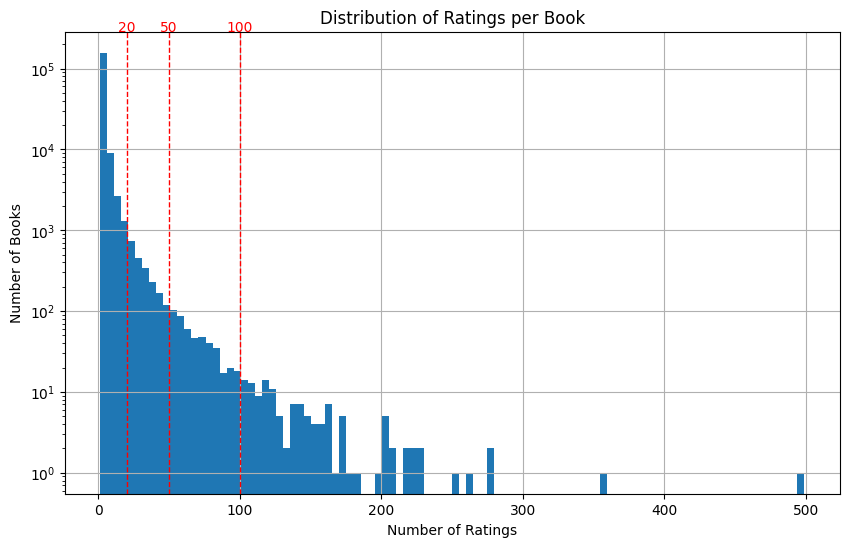

In [46]:
ratings_per_book = filtered_rating.groupby('Book-Title').count()['Book-Rating']

plt.figure(figsize=(10, 6))
ratings_per_book.hist(bins=100)
plt.title('Distribution of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.yscale('log')

thresholds = [20, 50, 100]
for threshold in thresholds:
    plt.axvline(x=threshold, color='red', linestyle='--', linewidth=1)
    plt.text(threshold, plt.ylim()[1], f'{threshold}', color='red', ha='center')

plt.show()

In [47]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 20
famous_books = y[y].index

In [48]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [49]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [50]:
pt.shape

(2831, 1405)

In [51]:
pt.fillna(0,inplace=True)

In [52]:
pt.sample(10)

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,274808,275020,275970,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
Cold Blooded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Negotiator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sarum: The Novel of England,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Seabiscuit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dr. Death (Alex Delaware Novels (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guardian Angel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Now and Forever,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bedford Square (Charlotte &amp; Thomas Pitt Novels (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acceptable Risk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
similarity_scores = cosine_similarity(pt)

In [54]:
similarity_scores.shape

(2831, 2831)

## Function to Recommend Books based on Similarity

In [55]:
def recommend(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]

    recommendations = []
    for i in similar_items:
        temp_df = books[books['Book-Title'] == pt.index[i[0]]].drop_duplicates('Book-Title')

        book_info = {
            "Book-Title": temp_df['Book-Title'].values[0],
            "Book-Author": temp_df['Book-Author'].values[0],
            "Image": temp_df['Image-URL-M'].values[0]
        }

        recommendations.append(book_info)

    return recommendations

In [56]:
book_name = input("Input Book name: ")

print("----------------------------------")
print("The Top-5 Recommended Books are:")
print("----------------------------------")
recommend(book_name)

Input Book name: Bedford Square (Charlotte &amp; Thomas Pitt Novels (Paperback))
----------------------------------
The Top-5 Recommended Books are:
----------------------------------


[{'Book-Title': 'Debt of Honor',
  'Book-Author': 'Tom Clancy',
  'Image': 'http://images.amazon.com/images/P/0399139540.01.MZZZZZZZ.jpg'},
 {'Book-Title': 'Sis Boom Bah',
  'Book-Author': 'Jane Heller',
  'Image': 'http://images.amazon.com/images/P/0312971362.01.MZZZZZZZ.jpg'},
 {'Book-Title': 'Ssn',
  'Book-Author': 'Tom Clancy',
  'Image': 'http://images.amazon.com/images/P/0425173534.01.MZZZZZZZ.jpg'},
 {'Book-Title': 'The Sky Is Falling',
  'Book-Author': 'Sidney Sheldon',
  'Image': 'http://images.amazon.com/images/P/0446610178.01.MZZZZZZZ.jpg'},
 {'Book-Title': 'Parsifal Mosaic',
  'Book-Author': 'Robert Ludlum',
  'Image': 'http://images.amazon.com/images/P/0553230212.01.MZZZZZZZ.jpg'}]